In [1]:
# For data analysis
import numpy as np
import pandas as pd

# For data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Reading in dataset
Cus_churn_data= pd.read_csv('Customer-Churn.csv')

In [3]:
# Dataset Overview
Cus_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
Cus_churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
Cus_churn_data.index

RangeIndex(start=0, stop=7043, step=1)

In [6]:
Cus_churn_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
Cus_churn_data.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
Cus_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Checking for missing values
Cus_churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Checking for duplicate
Cus_churn_data.duplicated().sum()

0

**Observations**
- There are no missing values in our dataset
- There is no duplicate in the dataset

In [11]:
Cus_churn_data.shape

(7043, 21)

In [12]:
Cus_churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


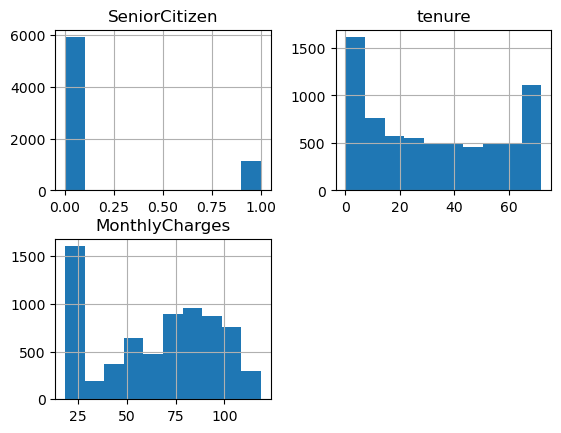

In [13]:
Cus_churn_data.hist()
plt.show()

In [14]:
Cus_churn_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [15]:
{x: len(Cus_churn_data[x].unique())for x in Cus_churn_data.columns}

{'customerID': 7043,
 'gender': 2,
 'SeniorCitizen': 2,
 'Partner': 2,
 'Dependents': 2,
 'tenure': 73,
 'PhoneService': 2,
 'MultipleLines': 3,
 'InternetService': 3,
 'OnlineSecurity': 3,
 'OnlineBackup': 3,
 'DeviceProtection': 3,
 'TechSupport': 3,
 'StreamingTV': 3,
 'StreamingMovies': 3,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 4,
 'MonthlyCharges': 1585,
 'TotalCharges': 6531,
 'Churn': 2}

## DATA WRANGLING


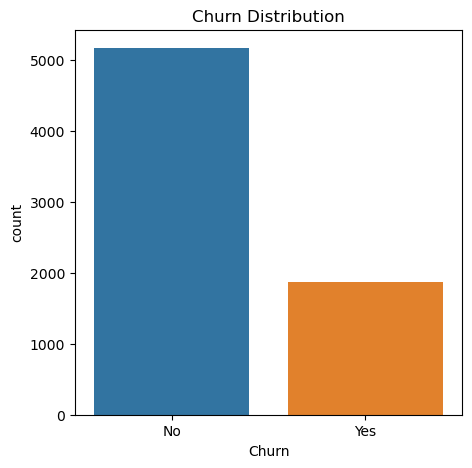

In [16]:
# How many customers churned

plt.figure(figsize= (5,5))
sns.countplot(data = Cus_churn_data, x= 'Churn')
plt.title('Churn Distribution');

In [17]:
# dropping off some redundant features
Cus_churn_data.drop(['OnlineBackup', 'PhoneService', 'PaperlessBilling'], axis =1, inplace = True)

In [18]:
Cus_churn_data.shape

(7043, 18)

In [19]:
# Renaming columns

Cus_churn_data.rename({'customerID': 'customer_ID', 'SeniorCitizen': 'Senior_Citizen', 'PhoneService': 'Phone_Service', 'MultipleLines': 'Multiple_Lines', 'InternetService': 'Internet_Service', 'OnlineSecurity': 'Online_Security', 'DeviceProtection': 'Device_Protection', 'TechSupport': 'Tech_Support', 'StreamingTV': 'Streaming_TV', 'PaperlessBilling': 'Paperless_Billing', 'PaymentMethod': 'Payment_Method', 'MonthlyCharges': 'Monthly_Charges', 'TotalCharges': 'Total_Charges'}, axis =1, inplace = True)

In [20]:
Cus_churn_data.head(5)

,customer_ID,gender,Senior_Citizen,Partner,Dependents,tenure,Multiple_Lines,Internet_Service,Online_Security,Device_Protection,Tech_Support,Streaming_TV,StreamingMovies,Contract,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No phone service,DSL,No,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,No,DSL,Yes,Yes,No,No,No,One year,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,No,DSL,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No phone service,DSL,Yes,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,No,Fiber optic,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


## PHASE 1
### EXPLORATORY DATA ANALYSIS
- Univariate
- Bivariate
- Multivariate

In [21]:
Cus_churn_data.describe(exclude = 'int64').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_ID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Multiple_Lines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Internet_Service,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online_Security,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Device_Protection,7043,3,No,3095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tech_Support,7043,3,No,3473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Streaming_TV,7043,3,No,2810,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
Cus_churn_data.customer_ID.value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customer_ID, Length: 7043, dtype: int64

In [23]:
Cus_churn_data.groupby(['gender', 'Contract']).count()['customer_ID']

gender  Contract      
Female  Month-to-month    1925
        One year           718
        Two year           845
Male    Month-to-month    1950
        One year           755
        Two year           850
Name: customer_ID, dtype: int64

In [24]:
Cus_churn_data.groupby(['gender', 'Tech_Support']).count()['customer_ID']

gender  Tech_Support       
Female  No                     1714
        No internet service     747
        Yes                    1027
Male    No                     1759
        No internet service     779
        Yes                    1017
Name: customer_ID, dtype: int64

## Narration
### Based on Gender

The male gender has the highest month to month contract with the company, the male gender has more contract in One year than the female and the male gender has the highest contract in the company than the female based on gender

### Based on Tech Support
 More female requires tech support than the male gender

In [25]:
Cus_churn_data.groupby(['gender', 'Partner']).count()['customer_ID']

gender  Partner
Female  No         1800
        Yes        1688
Male    No         1841
        Yes        1714
Name: customer_ID, dtype: int64

**Observation**
- It is evident that there are more male customers than female. 1800 female customers do not have partner where as 1688 of them have partners. The number of female customers that do not have partners are more compared to those that have partners
- 1841 male customers do not have partners whereas 1714 of the make customers have partners 

In [26]:
# Grabbing rows by integers
Cus_churn_data.iloc[0:4]

,customer_ID,gender,Senior_Citizen,Partner,Dependents,tenure,Multiple_Lines,Internet_Service,Online_Security,Device_Protection,Tech_Support,Streaming_TV,StreamingMovies,Contract,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No phone service,DSL,No,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,No,DSL,Yes,Yes,No,No,No,One year,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,No,DSL,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No phone service,DSL,Yes,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No


### UNIVARIATE ANALYSIS

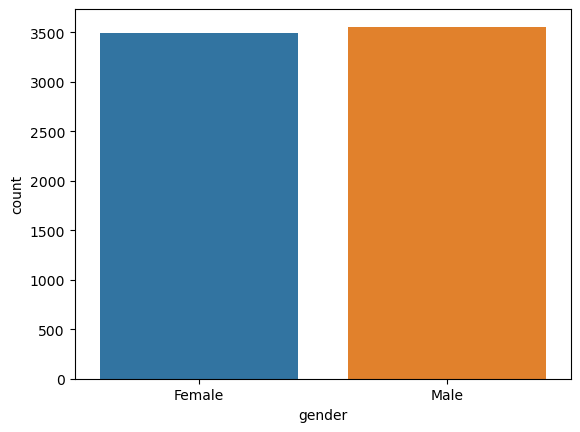

In [27]:
# Count by gender
sns.countplot('gender', data=Cus_churn_data);

In [28]:
# Total number of male to female
Cus_churn_data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

#### Narration of my observation
- We have 3555 males and 3488 females making a total of 7043 customers. 
- The male are higher in number than the female. 

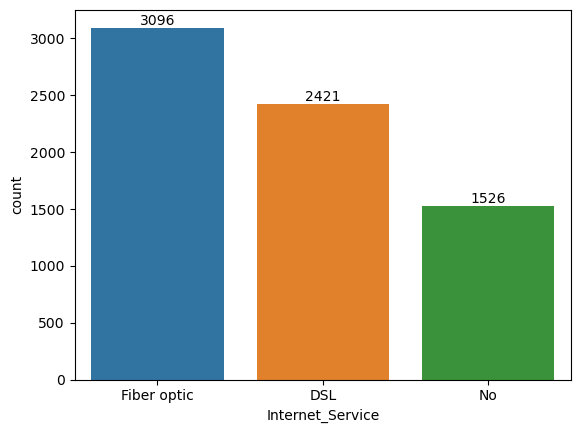

In [29]:
# count by internet service
ax =sns.countplot(x=Cus_churn_data['Internet_Service'],order= Cus_churn_data['Internet_Service'].value_counts(ascending=False).index)
values= Cus_churn_data['Internet_Service'].value_counts(ascending=False).values
ax.bar_label(container= ax.containers[0],labels=values);

#### Narration of my observation
- For the internet service, 3096 customers use Fiber optic.
- 2421 customers use DSL
- 1526 customers do not use any internet service

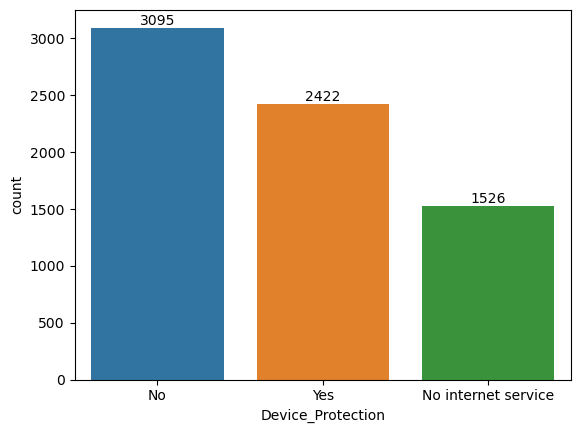

In [30]:
# How many people uses device protection
ax =sns.countplot(x=Cus_churn_data['Device_Protection'],order= Cus_churn_data['Device_Protection'].value_counts(ascending=False).index)
values= Cus_churn_data['Device_Protection'].value_counts(ascending=False).values
ax.bar_label(container= ax.containers[0],labels=values);

#### Narration of my observation
- 3095 customers do not have device protection service.
- 2422 customers have device protection and 1526 customers do not use internet service. 

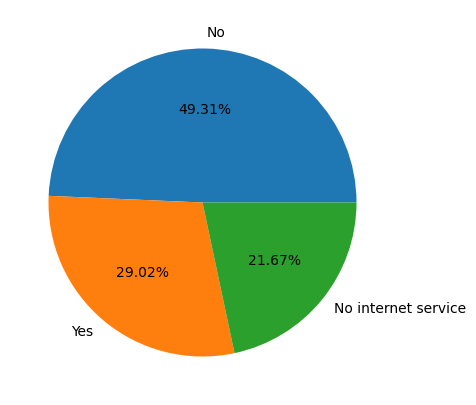

In [31]:
# percerntage of people who use tech support
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(Cus_churn_data['Tech_Support'])
ax.pie(count.values(), labels =count.keys(), autopct = lambda p: f'{p:.2f}%')
plt.show()

#### Narration of my observation 
- From the pie chart we can see that 49.31% of customers do not subscribe or use tech support service. 
- 29.02% of customers use tech support service.
- 21.67% do not use internet service, thus they do not require tech support

## Numerical Visualization

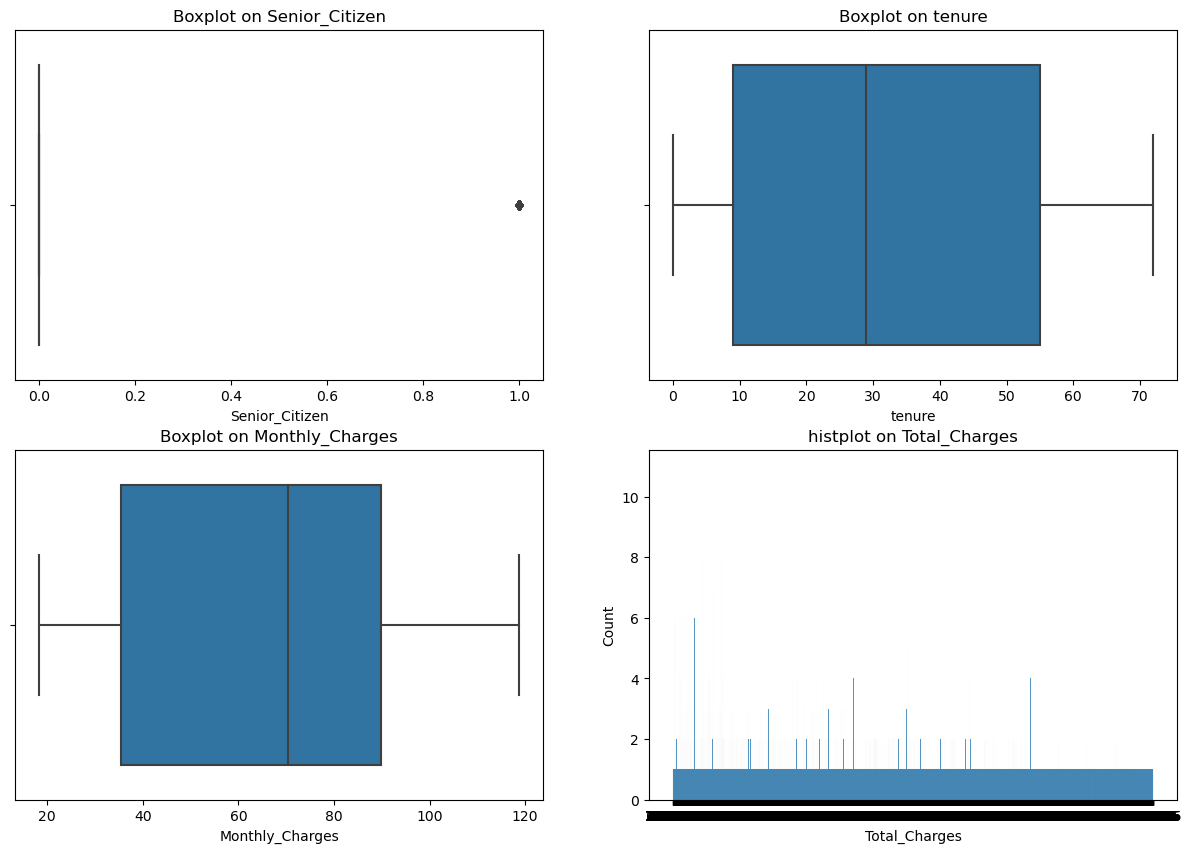

In [32]:
fig, axs = plt.subplots(nrows= 2, ncols= 2, figsize=(15,10))

sns.boxplot(x ='Senior_Citizen', data= Cus_churn_data, ax = axs[0,0])
axs[0,0].set_title('Boxplot on Senior_Citizen')

sns.boxplot(x ='tenure', data= Cus_churn_data, ax = axs[0,1])
axs[0,1].set_title('Boxplot on tenure')

sns.boxplot(x ='Monthly_Charges', data= Cus_churn_data, ax = axs[1,0])
axs[1,0].set_title('Boxplot on Monthly_Charges')

sns.histplot(x ='Total_Charges', data= Cus_churn_data, ax = axs[1,1])
axs[1,1].set_title('histplot on Total_Charges');

In [33]:
Cus_churn_data.columns

Index(['customer_ID', 'gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'tenure', 'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'StreamingMovies',
       'Contract', 'Payment_Method', 'Monthly_Charges', 'Total_Charges',
       'Churn'],
      dtype='object')

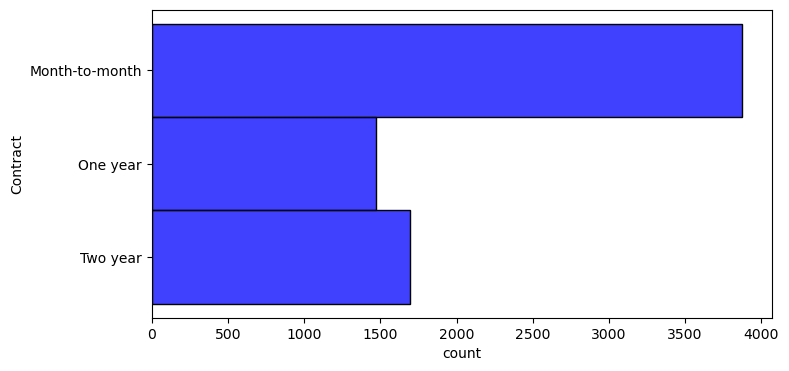

In [34]:
# Univariate distribution based on contract
f, ax = plt.subplots(figsize = (8,4))
ax, sns.histplot(Cus_churn_data, y= 'Contract', color='blue');
ax.set_xlabel('count')
ax.set_ylabel('Contract');

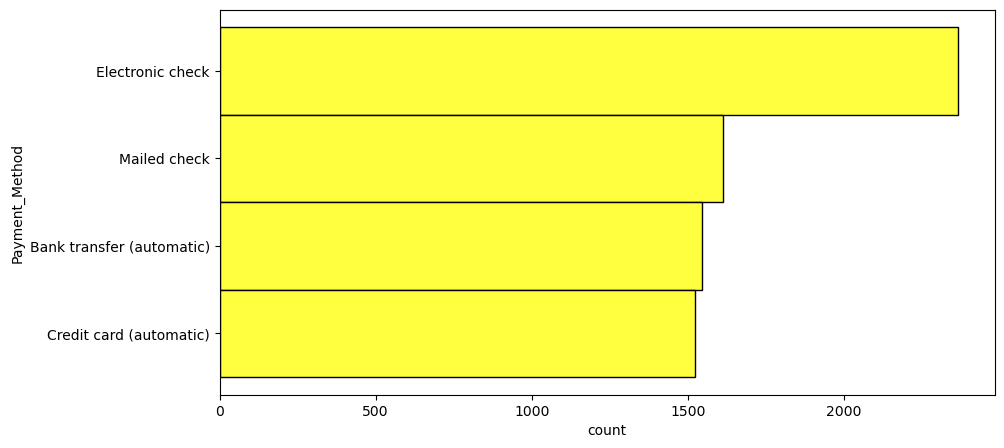

In [35]:
# Univariate distribution of Payment method
f, ax = plt.subplots(figsize = (10,5))
ax, sns.histplot(Cus_churn_data, y= 'Payment_Method', color='yellow');
ax.set_xlabel('count')
ax.set_ylabel('Payment_Method');
plt.show()

#### Narration
We can see vividly from our visualization that we have more male customers compared to female. For the type of payment method been used, the electronic check method stands out as majority uses this type of payment method the most. We can see that over 2000 customers uses electronic payment method, followed by mailed check, and then Bank transfer (automatic) and then the credit card which is the list used.  

### BIVARIATE ANALYSIS

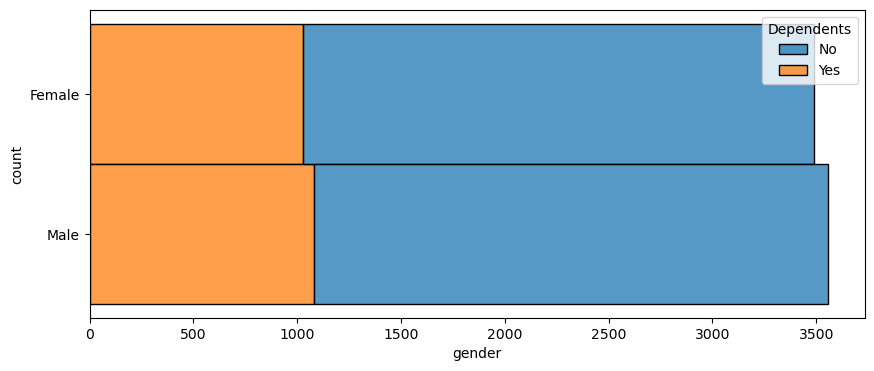

In [36]:
# Bivariate distribution based on gender
f, ax = plt.subplots(figsize = (10,4))
ax, sns.histplot(Cus_churn_data, y= 'gender', hue = 'Dependents', multiple= 'stack' ,color='Blues_d')
ax.set_xlabel('gender')
ax.set_ylabel('count');

In [37]:
# sum of monthly charges by various gender
gend_monthcharge = Cus_churn_data.groupby('gender')['Monthly_Charges'].sum().reset_index()
gend_monthcharge

,gender,Monthly_Charges
0,Female,227432.4
1,Male,228684.2


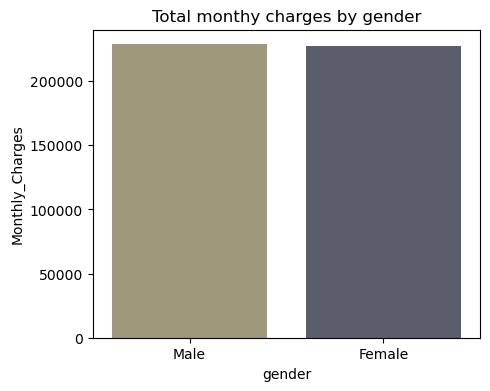

In [38]:
# Bivariate distribution based on gender
f, axs = plt.subplots(figsize = (5,4))
sns.barplot(x= 'gender', data = gend_monthcharge, y ='Monthly_Charges', order = ['Male', 'Female'], palette= 'cividis_r')
axs.set_title('Total monthy charges by gender');

Text(0.5, 1.0, 'Dependent and tenure')

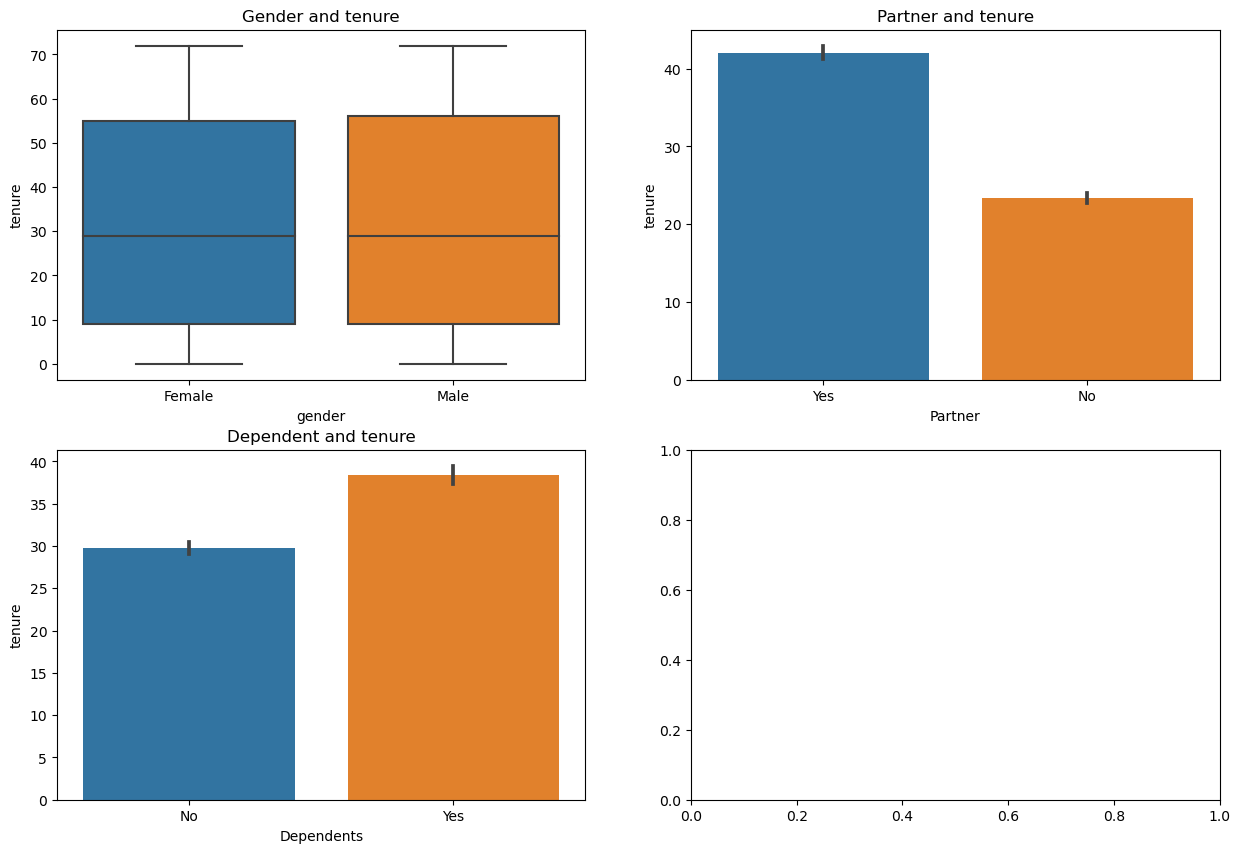

In [39]:
# Bivariate distribution of gender, partner and dependent by tenure
fig, axs = plt.subplots(nrows= 2, ncols= 2, figsize=(15,10))

sns.boxplot(x ='gender', data= Cus_churn_data, y= 'tenure', ax = axs[0,0])
axs[0,0].set_title('Gender and tenure')

sns.barplot(x ='Partner', data= Cus_churn_data, y ='tenure', ax = axs[0,1])
axs[0,1].set_title('Partner and tenure')

sns.barplot(x ='Dependents', data= Cus_churn_data, y ='tenure', ax = axs[1,0])
axs[1,0].set_title('Dependent and tenure')

### Narration

This barplot shows that customers that have dependents have have subscribed more that customers without dependents. Also, customers with partners subscribe more to the telecom service than customers without partner. This tells us more about the churn behavior.

### APPROACH TAKEN
- Data Preprocessing
- Build ML models
- Model Evaluation
- Model Optimization
- Productionize Model or Report Best performing model

## PHASE 2
### Feature Engineering/Data Preprocessing
- Data Cleaning
- Encoding Categorical Variable
- Data Normalization

In [40]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [41]:
Cus_churn_data_df1 = Cus_churn_data.copy()

In [42]:
Cus_churn_data_df1.shape

(7043, 18)

In [43]:
cat_var= (Cus_churn_data_df1.dtypes == 'object')
cat_var=list(cat_var[cat_var].index)

encoder = LabelEncoder()
for i in cat_var:
    Cus_churn_data_df1[i] = Cus_churn_data_df1[[i]].apply(encoder.fit_transform)

In [44]:
Cus_churn_data_df1.head(2)

,customer_ID,gender,Senior_Citizen,Partner,Dependents,tenure,Multiple_Lines,Internet_Service,Online_Security,Device_Protection,Tech_Support,Streaming_TV,StreamingMovies,Contract,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,5375,0,0,1,0,1,1,0,0,0,0,0,0,0,2,29.85,2505,0
1,3962,1,0,0,0,34,0,0,2,2,0,0,0,1,3,56.95,1466,0


In [45]:
# Drop customerID column
Cus_churn_data_df1.drop('customer_ID', axis = 1, inplace = True)

In [46]:
# Scaling the dataset
#Initialize your MinMaxScaler
scaler = MinMaxScaler()
scaled_Cus_churn_data= scaler.fit_transform(Cus_churn_data_df1)
scaled_Cus_churn_data = pd.DataFrame(scaled_Cus_churn_data, columns = Cus_churn_data_df1.columns)

In [47]:
scaled_Cus_churn_data

,gender,Senior_Citizen,Partner,Dependents,tenure,Multiple_Lines,Internet_Service,Online_Security,Device_Protection,Tech_Support,Streaming_TV,StreamingMovies,Contract,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,0.0,0.0,1.0,0.0,0.013889,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.115423,0.383614,0.0
1,1.0,0.0,0.0,0.0,0.472222,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5,1.000000,0.385075,0.224502,0.0
2,1.0,0.0,0.0,0.0,0.027778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.354229,0.024043,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.5,0.0,1.0,1.0,1.0,0.0,0.0,0.5,0.000000,0.239303,0.214395,0.0
4,0.0,0.0,0.0,0.0,0.027778,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.521891,0.141654,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.333333,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.5,1.000000,0.662189,0.244564,0.0
7039,0.0,0.0,1.0,1.0,1.000000,1.0,0.5,0.0,1.0,0.0,1.0,1.0,0.5,0.333333,0.845274,0.872588,0.0
7040,0.0,0.0,1.0,1.0,0.152778,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.112935,0.458499,0.0
7041,1.0,1.0,1.0,0.0,0.055556,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.558706,0.407351,1.0


## PHASE 3
### MACHINE LEARNING

In [48]:
# Segment Dataset
y= scaled_Cus_churn_data.pop('Churn')

In [49]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64

In [50]:
# Importing train test split
from sklearn.model_selection import train_test_split

In [51]:
# Split the dataset into training and testing set
X_train, x_test, y_train, y_test = train_test_split(scaled_Cus_churn_data, y, test_size= 0.2, random_state= 42)

In [52]:
X_train.head()

,gender,Senior_Citizen,Partner,Dependents,tenure,Multiple_Lines,Internet_Service,Online_Security,Device_Protection,Tech_Support,Streaming_TV,StreamingMovies,Contract,Payment_Method,Monthly_Charges,Total_Charges
2142,0.0,0.0,0.0,1.0,0.291667,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.5,1.000000,0.463682,0.093415
1623,0.0,0.0,0.0,0.0,0.750000,1.0,0.5,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.785572,0.661409
6074,1.0,0.0,1.0,0.0,0.013889,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.051741,0.297090
1362,1.0,0.0,0.0,0.0,0.055556,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.516915,0.308116
6754,1.0,0.0,0.0,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.434328,0.000000


In [53]:
X_train.shape

(5634, 16)

In [54]:
y_train.head()

2142    0.0
1623    0.0
6074    1.0
1362    1.0
6754    0.0
Name: Churn, dtype: float64

In [55]:
# Instantiates the model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [56]:
# Create the prediction file
log_pred = log_reg.predict(x_test)
log_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
log_pred = log_reg.predict(x_test)
print (" Logistic Regression Accuracy Score :" , format (log_reg.score(x_test,y_test)))

 Logistic Regression Accuracy Score : 0.8048261178140526


In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
# classification report for logistic regression model
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1036
         1.0       0.66      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
#Intantiate the model
dec_tree = DecisionTreeClassifier()

#Training the model
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
# Create prediction file
dec_pred = dec_tree.predict(x_test)
print (" Decision Tree Accuracy Score :" , format (dec_tree.score(x_test,y_test)))

 Decision Tree Accuracy Score : 0.7352732434350603


In [63]:
# classification report for Decison Tree model
print(classification_report(y_test, dec_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82      1036
         1.0       0.50      0.48      0.49       373

    accuracy                           0.74      1409
   macro avg       0.66      0.65      0.66      1409
weighted avg       0.73      0.74      0.73      1409



In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import model_selection

In [65]:
# Instantiate the model
k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train,y_train)

KNeighborsClassifier()

In [66]:
# Create the prediction file
k_pred = k_neighbors.predict(x_test)
k_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [67]:
k_pred = k_neighbors.predict(x_test)
print (" KNearest Neighbors Accuracy Score :" , format (k_neighbors.score(x_test,y_test)))

 KNearest Neighbors Accuracy Score : 0.7579843860894251


In [68]:
# classification report for KNN model
print(classification_report(y_test, k_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84      1036
         1.0       0.55      0.46      0.50       373

    accuracy                           0.76      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.75      0.76      0.75      1409



In [69]:
# Instantiate the model
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [70]:
# Create the prediction file
svm_pred = svm.predict(x_test)
print (" Support Vector Machine Accuracy Score :" , format (svm.score(x_test,y_test)))

 Support Vector Machine Accuracy Score : 0.8090844570617459


In [71]:
# classification report for SVM model
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.88      1036
         1.0       0.70      0.49      0.58       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



### Narration
- Based on the accuracy scores, Support Vector Machine does better in the prediction.
- Based on the classification report, we can see that Support Vector Machine algorithm tells us more through the evaluation metrics, the precision has the highest values. This shows that when it predicts that customers has not cancelled their service with the company (0 class), it is correct 83% of the time. If it predicts that customers cancelled their service with the company, then it is 70% correct all the time. 
- Recall means the true positive rate and tells us 92% (for the 0 class) of customers has not cancelled their service with the company. This score is very high and is good for this model prediction. 
- Wowwww, as we can see, logistic regression and SVM are quite close considering their precision and recall in the classification report, therefore, we wil look at f1 score. Logistic regression has 87% score while SVM has 88%, so we will go with SVM model as our best performing model. 

#### Observation
The company should be more concerned with better results on true positives. according to recall, a model with no false negatives has a recall of 1 and since SVM has a recall of 0.92 which is close to 1, then the business should be concerned with results on true positives

In [72]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To Plot a confusion matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels= np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='')
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

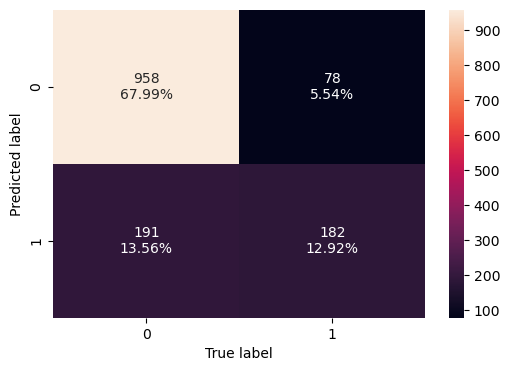

In [73]:
confusion_matrix_sklearn(svm, x_test, y_test)

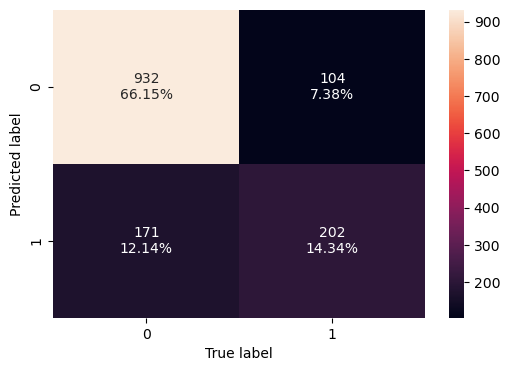

In [74]:
confusion_matrix_sklearn(log_reg, x_test, y_test)

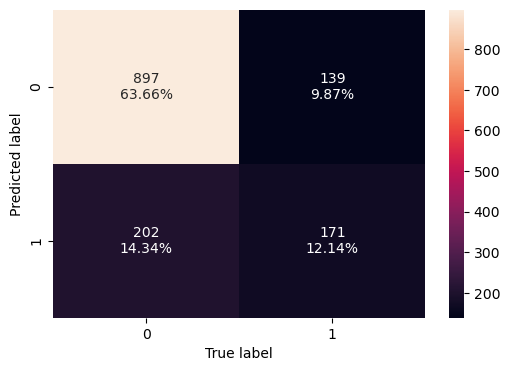

In [75]:
confusion_matrix_sklearn(k_neighbors, x_test, y_test)

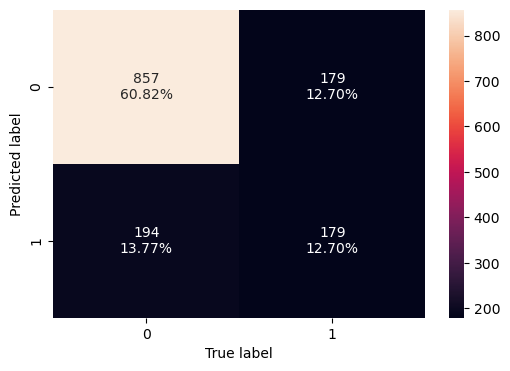

In [76]:
confusion_matrix_sklearn(dec_tree, x_test, y_test)

***Observation***
- True positives 958 customers did not churn meaning they didnt cancel their service and the algorithm predicted right.
- False negatives 198 customers did not churn meaning that they didnt cancel their service and the algorithm predicted that they churn. So I would advice the company to be more concerned about the true positives. 

## Model Optimization

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,r2_score

In [78]:
params = {
    'C' : [1.0, 1.5, 2.0],
    'kernel' : ['poly'],
    'gamma' : ['auto']
    
}

#to find the best parameter for the model
score = make_scorer(r2_score)
grid = GridSearchCV(svm,params,scoring=score,cv=3,return_train_score=True)
grid.fit(X_train,y_train)
print(grid.best_params_, '\n')

{'C': 2.0, 'gamma': 'auto', 'kernel': 'poly'} 



In [79]:
best_model = grid.best_estimator_
new_pred = best_model.predict(x_test)
new_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [80]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.98      0.86      1036
         1.0       0.76      0.14      0.24       373

    accuracy                           0.76      1409
   macro avg       0.76      0.56      0.55      1409
weighted avg       0.76      0.76      0.69      1409



In [86]:
# Productionize your model
import joblib

filename = './svm.pkl'
joblib.dump(log_reg,filename)

['./svm.pkl']